In [963]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import numpy as np
#from pymavlink import mavutil
import sys
import signal
import random as rand

In [964]:
img = cv2.imread('rov_pool.jpg')

#img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img)
cap = cv2.VideoCapture('AUV_Vid.mkv')

ret, frame = cap.read()

#cap = cv2.VideoCapture("rtsp://192.168.1.102:8554/rovcam")
#ret, frame = cap.read()
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))



In [965]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        return True
    else:
        return False

In [966]:
def makegray(img):
    gray = cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE) # convert to grayscale
    return gray



In [967]:
'''def detectedges(img):
    edges = cv2.Canny(img,10, 10, apertureSize=3) # detect edges
    return edges

plt.imshow(detectedges(makegray(img)))'''

'def detectedges(img):\n    edges = cv2.Canny(img,10, 10, apertureSize=3) # detect edges\n    return edges\n\nplt.imshow(detectedges(makegray(img)))'

In [968]:
'''def detectlines(edges):
    lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,        ) # detect lines
    return lines
print(detectlines(detectedges(makegray(frame))))'''
def detect_lines(img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100,maxLineGap=20):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize) # detect edges
    lines = cv2.HoughLinesP(edges,10,np.pi/210,70,minLineLength=270,maxLineGap=25) # detect lines
    if lines is not None:
        return((lines))
    else:
        #raise(ValueError)
        return(None)

In [969]:
def drawlane(img, lines, colors):
    
    line = 0
    if lines is None:
            pass
    else:
        while line < len(lines):
            x1 = lines[line][0]
            x2 = lines[line][1]
            y1 = lines[line][2]
            y2 = lines[line][3]
            cv2.line(img, (x1, y1), (x2, y2), colors, 3)
            line+=1
        
    return(img)
   
def draw_lines(img, lines, colors):
    if lines is None:
            pass
    else:
        for line in lines:
            
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), colors, 5)
        
    return(img)

In [970]:
'''def get_slopes_intercepts(lines):
    gradient1 = [None]
    gradient = []
    intercepts1 = [None]
    intercepts = []
    if lines is None:
            pass
    else:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            gradient1[0] = (y2-y1)/(x2-x1)
            intercepts1[0] = (y2/(gradient1[0]*x2))
            if common_member(gradient, gradient1) == False:
                gradient.append(gradient1[0])
                intercepts.append(intercepts1[0])
        

        
    
    return ((gradient, intercepts))
    '''

def get_slopes_intercepts(lines):
    slopes = []
    intercepts = []
    line = 0
    while line < len(lines):
        
        slope = (lines[line][0][3] - lines[line][0][2]) / (lines[line][0][1] - lines[line][0][0])
        intercept = lines[line][0][2] - slope * lines[line][0][0]
        slopes.append(slope)
        intercepts.append(intercept)
        line+=1
    return ((slopes, intercepts))


In [971]:
#Rome did this
def get_color():
    c=rand.randint(0,255)
    b=rand.randint(0,255)
    a=rand.randint(0,255)

    return((a,b,c))

In [972]:
#aj wrote this program lets hope it works
def detect_lanes(lines):
    lanes = []

    if lines is None:
        return None
    else:
        slopes, intercepts = get_slopes_intercepts(lines)
        for i in range(len(lines)):
            if lines[i][0][3] > len(img):
                pass
            else:
                for j in range(i+1, len(lines)):
                    
                    if (np.absolute(lines[i][0][0]-lines[j][0][0]) < 40) and (np.absolute(lines[i][0][1]-lines[j][0][1]) < 40):
                        j+=1
                        break
                    if np.absolute(np.abs(slopes[i] - slopes[j])) < 0.25:
                        lanes.append([lines[i], lines[j]])
                        i += 1 #to make sure single line isn't paired with more than one other line

    return (np.array(lanes).tolist()) 
'''def detect_lanes(lines):
    i = 0
    while i < len(lines):
        j = 0
        lane = []
        while j< i:
            m = round(get_slopes_intercepts(lines)[0][j], 1)
            a = round(get_slopes_intercepts(lines)[0][i],1)
           
            if (m <= 0.2+a or m >= a-0.2):
                lane.append([lines[j],lines[i]])
                
            j+=1
        #if eventualy going to intersect but not currently intersecting it is a lane
        
        i+=1
    return lane'''
'''
def detect_lanes(line_list):
    slopes = []
    intercepts = []
    valid_list1 = []
    valid_list2 = []
    lane_list = []
    indices = []

    for line in line_list:
       
        slopes.append(get_slopes_intercepts(line)[0])
        
        intercepts.append(get_slopes_intercepts(line)[1])
    
    slopes.sort()
    intercepts.sort()

    i=0
    for slope in slopes:
        if i == len(slopes) - 1:
            break
        if i == 0:
            continue
        if (slopes[i + 1] - slopes[i] < 0.6) and (intercepts[i + 1] - intercepts[i] < 200):
            valid_list1.append([line[i], line[i-1]])
        else:
            continue
    
    print(valid_list1)
    return valid_list1
    

        
'''
    
'''
for j in range(len(valid_list1)):
        pass
    '''



'\nfor j in range(len(valid_list1)):\n        pass\n    '

In [973]:
'''def drawlanes(img, lanes):
    detect_lanes(detect_lines(frame))
    for lane in lanes:
        for line in lane:
            drawline(img, lanes[lane][line], get_color())'''
def draw_lanes(image, lanes):
    if lanes is None:
        pass
    else:
        for lane in lanes:
            color = get_color()
            draw_lines(image, lane, color)
    return image

In [974]:
detect_lanes(detect_lines(frame))

In [975]:
#aj origianlly wrote this, I changed it to fix an error that i caused
def get_lane_center(lanes):
    
    if lanes is None:
        pass
    else:

        a = lanes[0][0]
        b = lanes[0][1]
        c = (a[0][3] - a[0][2]) / (a[0][1] - a[0][0])
        d = (b[0][3] - b[0][2]) / (b[0][1] - b[0][0])
        slope = (c+d)/ 2
        center = (a[0][2] - c * b[0][0]) + (b[0][2]-d*b[0][0]) / 2
        for i in range(0, len(lanes)-1):
            lane_center = 
            # we get intercepts for line 1 and line 2 for each lane and get the average
            if np.abs(lane_center - len(img[1])/2) < np.abs(center - len(img[0])/2):
                center = lane_center
                
         
                print((center, slope))


        return ((center, slope))


In [976]:
##Rome wrote this
def recommend_direction(center,slope):
    if center is None:
        pass
    else:
        #Gets if center is within 10 pixels of 960, it returns forward, otherwise gets back to center
        if center< len(img[0]-10):
            return("left")
        elif center>len(img[0]+10):
            return("right")
        elif center <970 and center>950:
            return("forward")

In [977]:
a = makegray(img)

In [978]:
#b = detectedges(a)

6


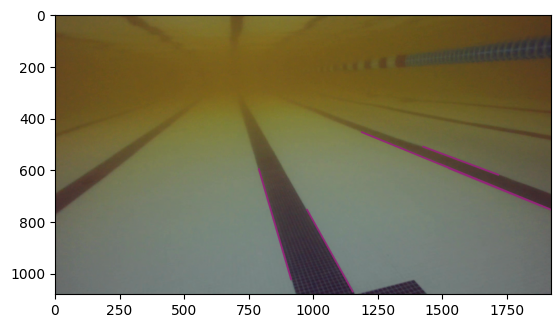

In [979]:
c = detect_lines(img, 36, 80, 3)

print(len(c))
plt.imshow(draw_lines(img, c, get_color()))

In [980]:
d = detect_lanes(c)
print(d)
print(get_slopes_intercepts(d[0])[0][0])
get_slopes_intercepts(d[0])


[[[[1520, 594, 1876, 739]], [[1421, 511, 1713, 620]]], [[[1421, 511, 1713, 620]], [[1489, 579, 1918, 755]]]]
1.2278617710583153


([1.2278617710583153, 1.201098901098901],
 [9.650107991360755, 6.238461538461706])

In [981]:
#e = get_lane_center(d)


In [982]:
#print(recommend_direction(e[0], e[1]))

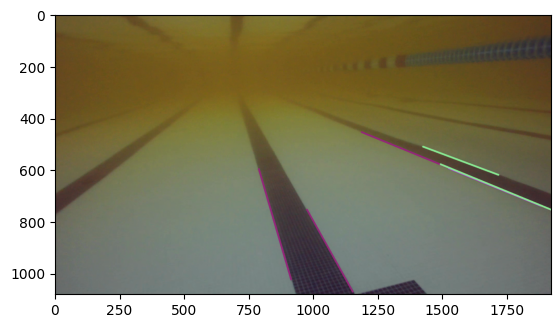

In [983]:
plt.imshow(draw_lanes(img, d))

In [984]:
'''count = 0
frequency = 200
newframe = []
while ret:
    if count%frequency == 0:
            #newframe.append(drawline(frame))
            plt.imshow(frame)
            plt.show(frame)
            
    count +=1
    ret, frame = cap.read()'''
    

'count = 0\nfrequency = 200\nnewframe = []\nwhile ret:\n    if count%frequency == 0:\n            #newframe.append(drawline(frame))\n            plt.imshow(frame)\n            plt.show(frame)\n            \n    count +=1\n    ret, frame = cap.read()'

In [985]:
'''i = 0
while i < len(newframe):
   
   plt.imshow(newframe[i])
   i+=1
print(len(newframe))'''

'i = 0\nwhile i < len(newframe):\n   \n   plt.imshow(newframe[i])\n   i+=1\nprint(len(newframe))'

In [986]:
#cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
#cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
#cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
#pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
#pts = pts.reshape((-1, 1, 2))
#cv2.polylines(img, [pts], True, (0, 255, 255), 5)
#cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


In [987]:
'''at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)'''

"at_detector = Detector(families='tag36h11',\n                       nthreads=1,\n                       quad_decimate=1.0,\n                       quad_sigma=0.0,\n                       refine_edges=1,\n                       decode_sharpening=0.25,\n                       debug=0)\ntags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)\ncolor_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\nfor tag in tags:\n    for idx in range(len(tag.corners)):\n        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))\n\n    cv2.putText(color_img, str(tag.tag_id),\n                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),\n                fontFace=cv2.FONT_HERSHEY_SIMPLEX,\n                fontScale=0.8,\n                color=(0, 0, 255))\nplt.imshow(color_img)"

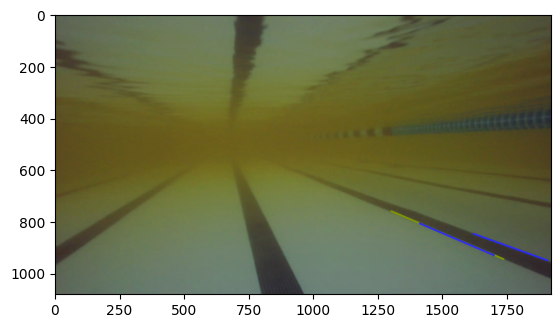

(1.3682545170541367, 1.3506191931791038)
(1.3682545170541367, 1.3506191931791038)
left


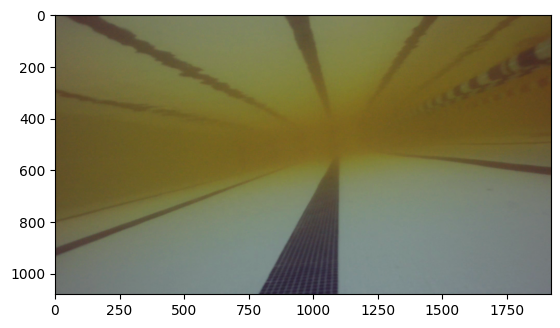

no recomended direction


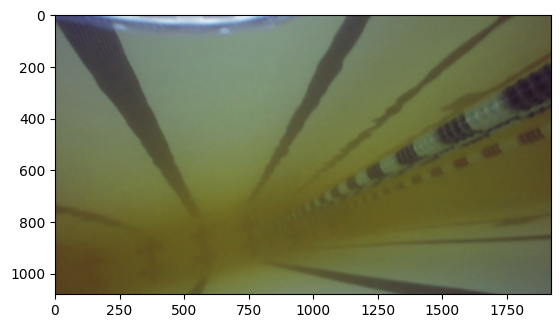

no recomended direction


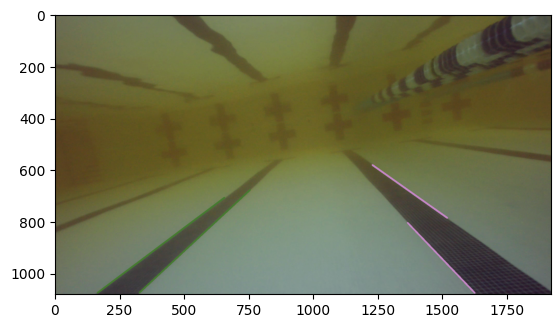

left


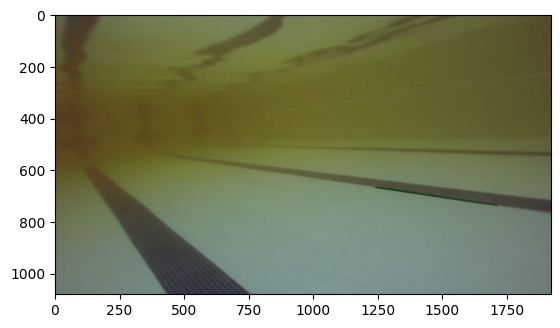

left


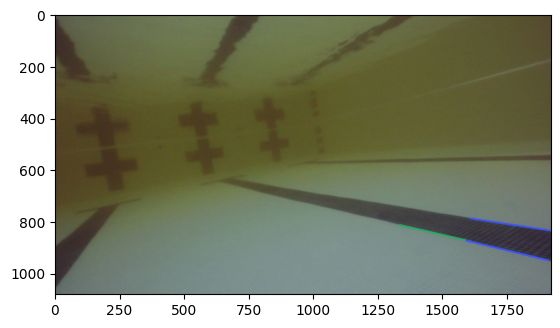

(1.3685299569827811, 1.3761940187472101)
(1.3685299569827811, 1.3761940187472101)
left


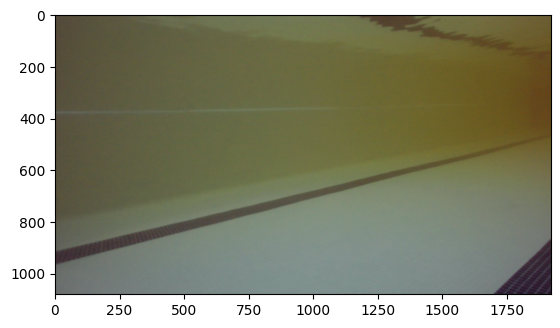

no recomended direction


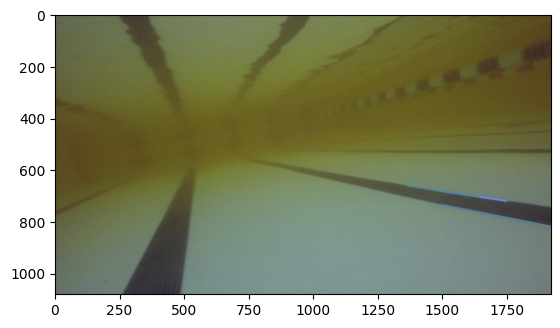

(1.323389058698771, 1.3770472167299865)
(1.3922521322062513, 1.3770472167299865)
(1.323389058698771, 1.3770472167299865)
(1.3922521322062513, 1.3770472167299865)
left


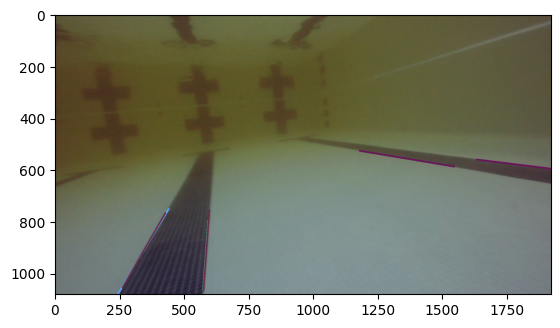

left


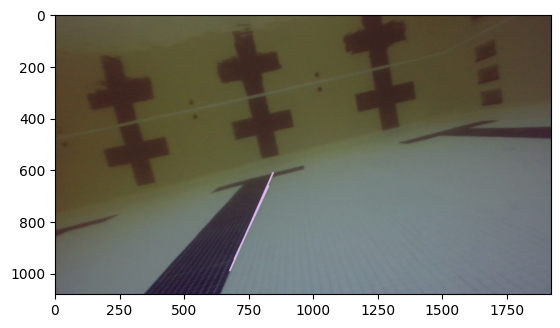

right


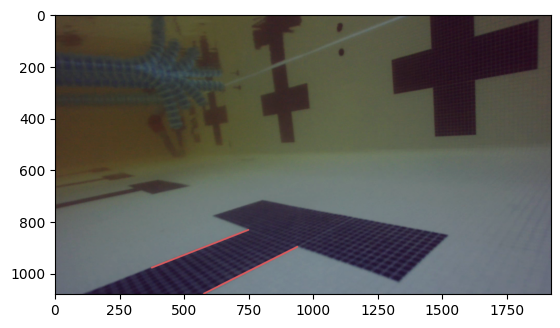

left


In [988]:
count=0
frequency=200
pic_list=[]
while ret:
    if count%frequency==0:
        a=detect_lines(frame, 36, 80, 3)
        b = detect_lanes(a)
        
        plt.imshow(draw_lanes(frame, b))
        plt.show()
        
        
        if b == None or len(b) == 0:
            print("no recomended direction")
        else:
            print(recommend_direction(get_lane_center(b)[0], get_lane_center(b)[1]))
        
        count+=1

    count+=1

    ret, frame = cap.read()

    